In [1]:
!pip install opencv-python

## 1-Imports

In [2]:
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
image_array=cv2.imread("dataset/with-mask/00000_Mask.jpg")

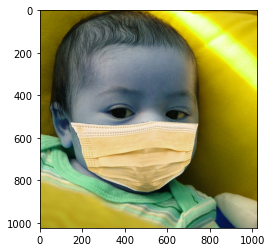

In [4]:
plt.imshow(image_array)

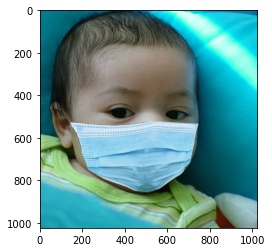

In [5]:
plt.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))

In [6]:
image_array.shape

(1024, 1024, 3)

## 2- Uploading the dataset

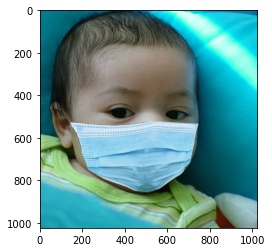

In [7]:
datadirectory="dataset/"
classes=["with-mask","without-mask"]
for category in classes:
    path=os.path.join(datadirectory,category)
    for img in os.listdir(path):
        image_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    
     

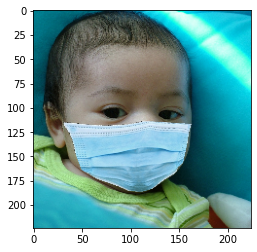

In [8]:
image_size=224
new_array=cv2.resize(image_array,(image_size,image_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
image_array.shape

(1024, 1024, 3)

In [10]:
new_array.shape

(224, 224, 3)

## 3- Converting the images into arrays

In [11]:
training_data=[]
def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                image_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(image_array,(image_size,image_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
create_training_data()

In [13]:
print(len(training_data))

1950


In [14]:
import random 
random.shuffle(training_data)

In [15]:
X=[]
y=[]
 
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,image_size,image_size,3)


In [16]:
X.shape

(1950, 224, 224, 3)

In [17]:
#normalize the data
X= X/225.0;

In [18]:
y[1000]

1

In [19]:
Y=np.array(y)

In [20]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



## 4-Deep learning model-transder learning

In [22]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [138]:
model=tf.keras.applications.mobilenet.MobileNet() #pretrained model

In [139]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [140]:
base_input=model.layers[0].input

In [141]:
base_output=model.layers[-4].output

In [142]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)
final_output=layers.Activation('sigmoid')(final_output)
####################################################
# dense_layer_1 = layers.Dense(50, activation='relu')
# dense_layer_2 = layers.Dense(20, activation='relu')
# prediction_layer = layers.Dense(5, activation='sigmoid')

In [143]:
new_model=keras.Model(inputs=base_input ,outputs=final_output)

In [144]:
new_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [145]:
optimizer = keras.optimizers.Adam(lr=0.01)
new_model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [146]:
new_model.fit(X,Y,epochs=3,batch_size=50,validation_split=0.2) 

Epoch 1/3
32/32 [==============================] - 224s 7s/step - loss: 0.0651 - accuracy: 0.9737 - val_loss: 10.9571 - val_accuracy: 0.4641
Epoch 2/3
32/32 [==============================] - 213s 7s/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 5.4901 - val_accuracy: 0.4641
Epoch 3/3
32/32 [==============================] - 207s 6s/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 1.4629 - val_accuracy: 0.9154


In [147]:
new_model.save('my_model3.h5')

In [23]:
new_model=tf.keras.models.load_model('my_model3.h5')

## 5-cheaking the network for predictions

In [149]:
frame=cv2.imread('00002_Mask.jpg')

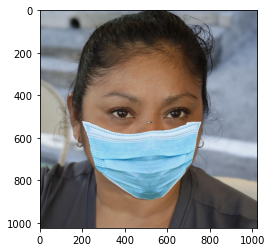

In [150]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [151]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [152]:
predictions=new_model.predict(final_image)

In [153]:
predictions

array([[8.446296e-30]], dtype=float32)

In [154]:
frame=cv2.imread('sad_woman.jpg')

In [155]:
frame.shape

(480, 852, 3)

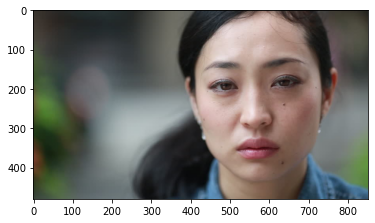

In [156]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [157]:
facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [158]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [159]:
gray.shape

(480, 852)

In [160]:
faces=facecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h, in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=facecascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("face ot detected")
    else:
        for (ex,ey,ew,eh)in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

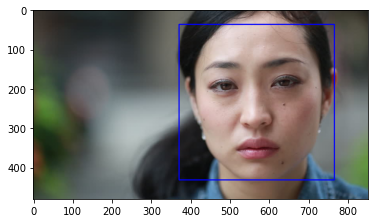

In [161]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

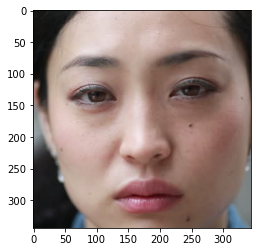

In [162]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [163]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [164]:
predictions=new_model.predict(final_image)

In [165]:
predictions

array([[1.]], dtype=float32)

# Real time demo face mask detection

In [25]:
import cv2
#from deepface import deepface
path='haarcascade_frontalface_default.xml'
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
#set rectangle background to white
rectangle_bgr=(225,225,225)
#make a black image
img=np.zeros((500,500))
#set some text
text="Some text in a box"
#get the width and height of the text box
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
#st the text start possision
text_offset_x=10
text_offset_y=img.shape[0]-25
#make the coords of the box with a small padding of two pixel+s
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)
#check if the webcam is opend correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    #eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")
    facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(facecascade.empty())
    faces=facecascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h, in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=facecascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")
        else:
            for (ex,ey,ew,eh)in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    predictions=new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if (predictions>=1):
        status="No Mask"
        
        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    else:
        status="Face Mask"
        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,225,0))
        
    #
    cv2.imshow('Face mask detection project',frame)
    
    if cv2.waitKey(2)&0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected
face not detected


KeyboardInterrupt: 